# Installing YOLOv11

In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 3.9 MB/s eta 0:00:00a 0:00:01


In [5]:
!pip install "ultralytics<=8.3.40"
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.7/8062.4 GB disk)


# changing directory to home

In [6]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


# downloading the dataset from roboflow

## loading roboflow api key from secrets from the environment of kaggle 

In [7]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
roboflow_api = user_secrets.get_secret("roboflow-api")

In [8]:
from roboflow import Roboflow
rf = Roboflow(api_key=roboflow_api)
project = rf.workspace("tomato-v0dw0").project("fist-detection-xw2vm")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fist-detection-1 in yolov11:: 100%|██████████| 1574/1574 [00:00<00:00, 9165.97it/s]


## Applied Augmentation: Flip (Vertical)

# custom training (50 epochs)

In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/kaggle/working
100%|███████████████████████████████████████| 18.4M/18.4M [00:00<00:00, 166MB/s]
New https://pypi.org/project/ultralytics/8.3.52 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/working/fist-detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize

In [10]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch1520.jpg
confusion_matrix_normalized.png			   train_batch1521.jpg
confusion_matrix.png				   train_batch1522.jpg
events.out.tfevents.1734803957.950a50332a52.126.0  train_batch1.jpg
F1_curve.png					   train_batch2.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
P_curve.png					   val_batch1_labels.jpg
PR_curve.png					   val_batch1_pred.jpg
R_curve.png					   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


# confusion matrix of the dataset

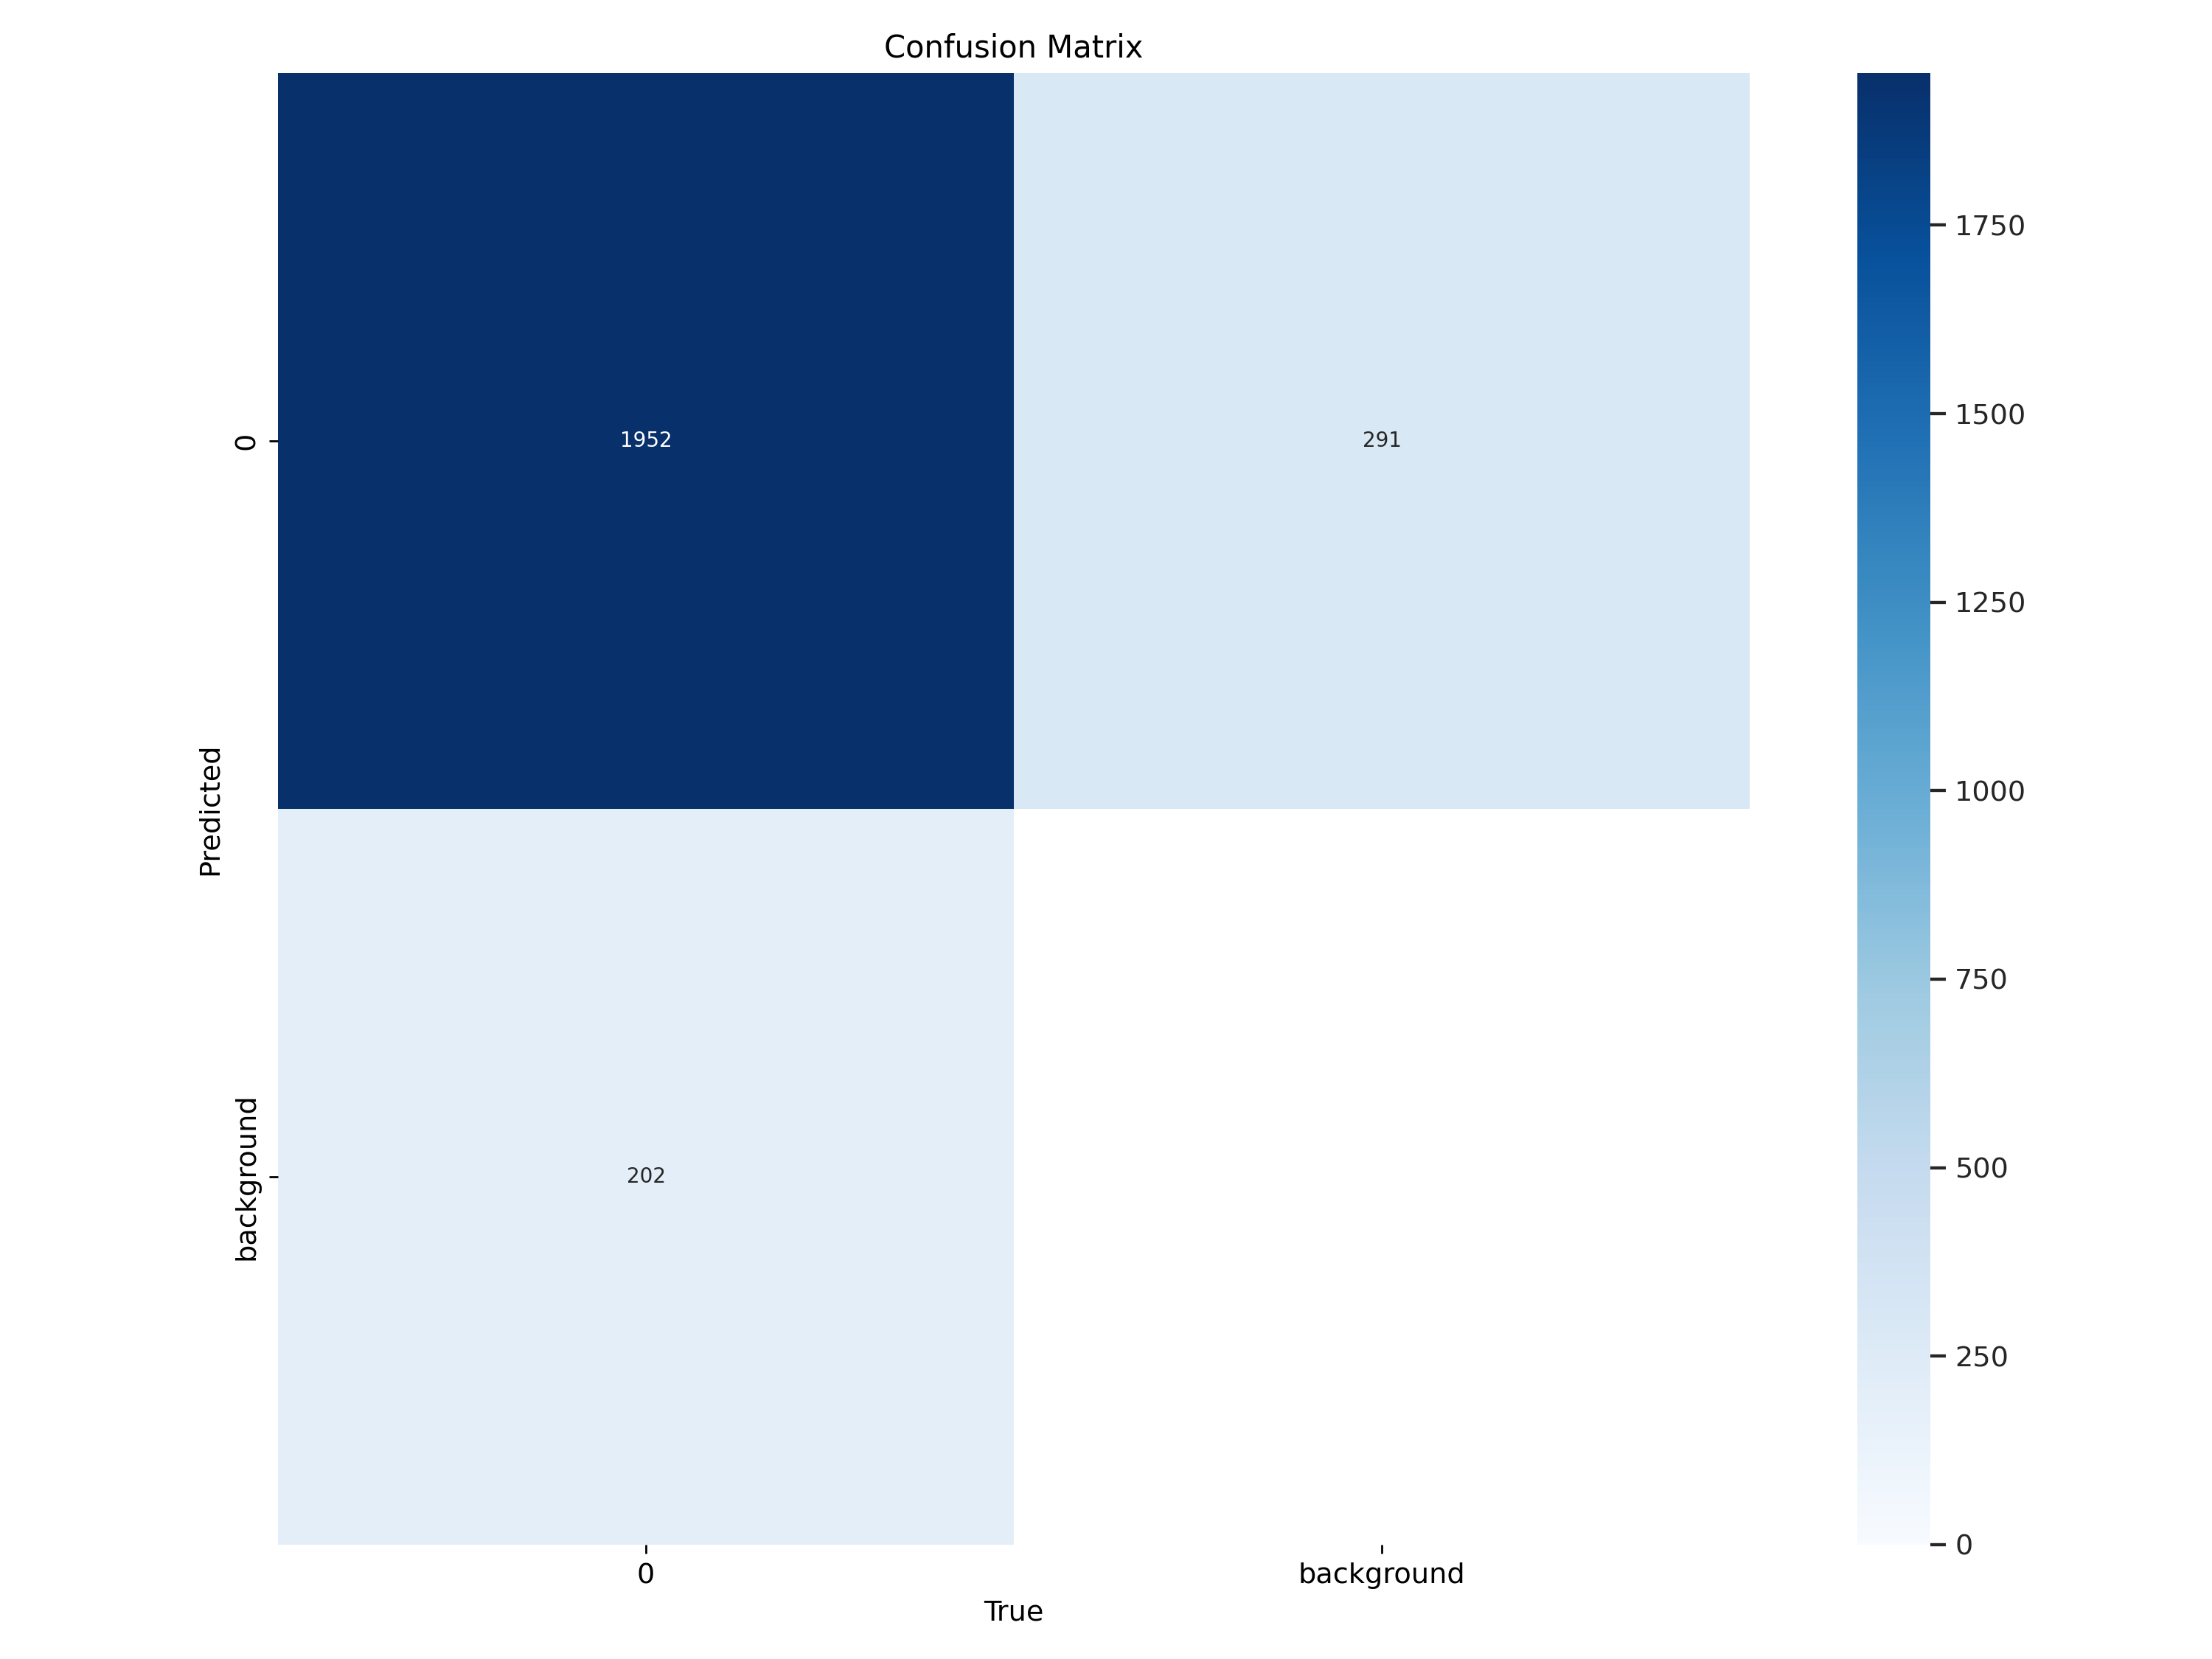

In [13]:
from IPython.display import Image as IPyImage
IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

# train result

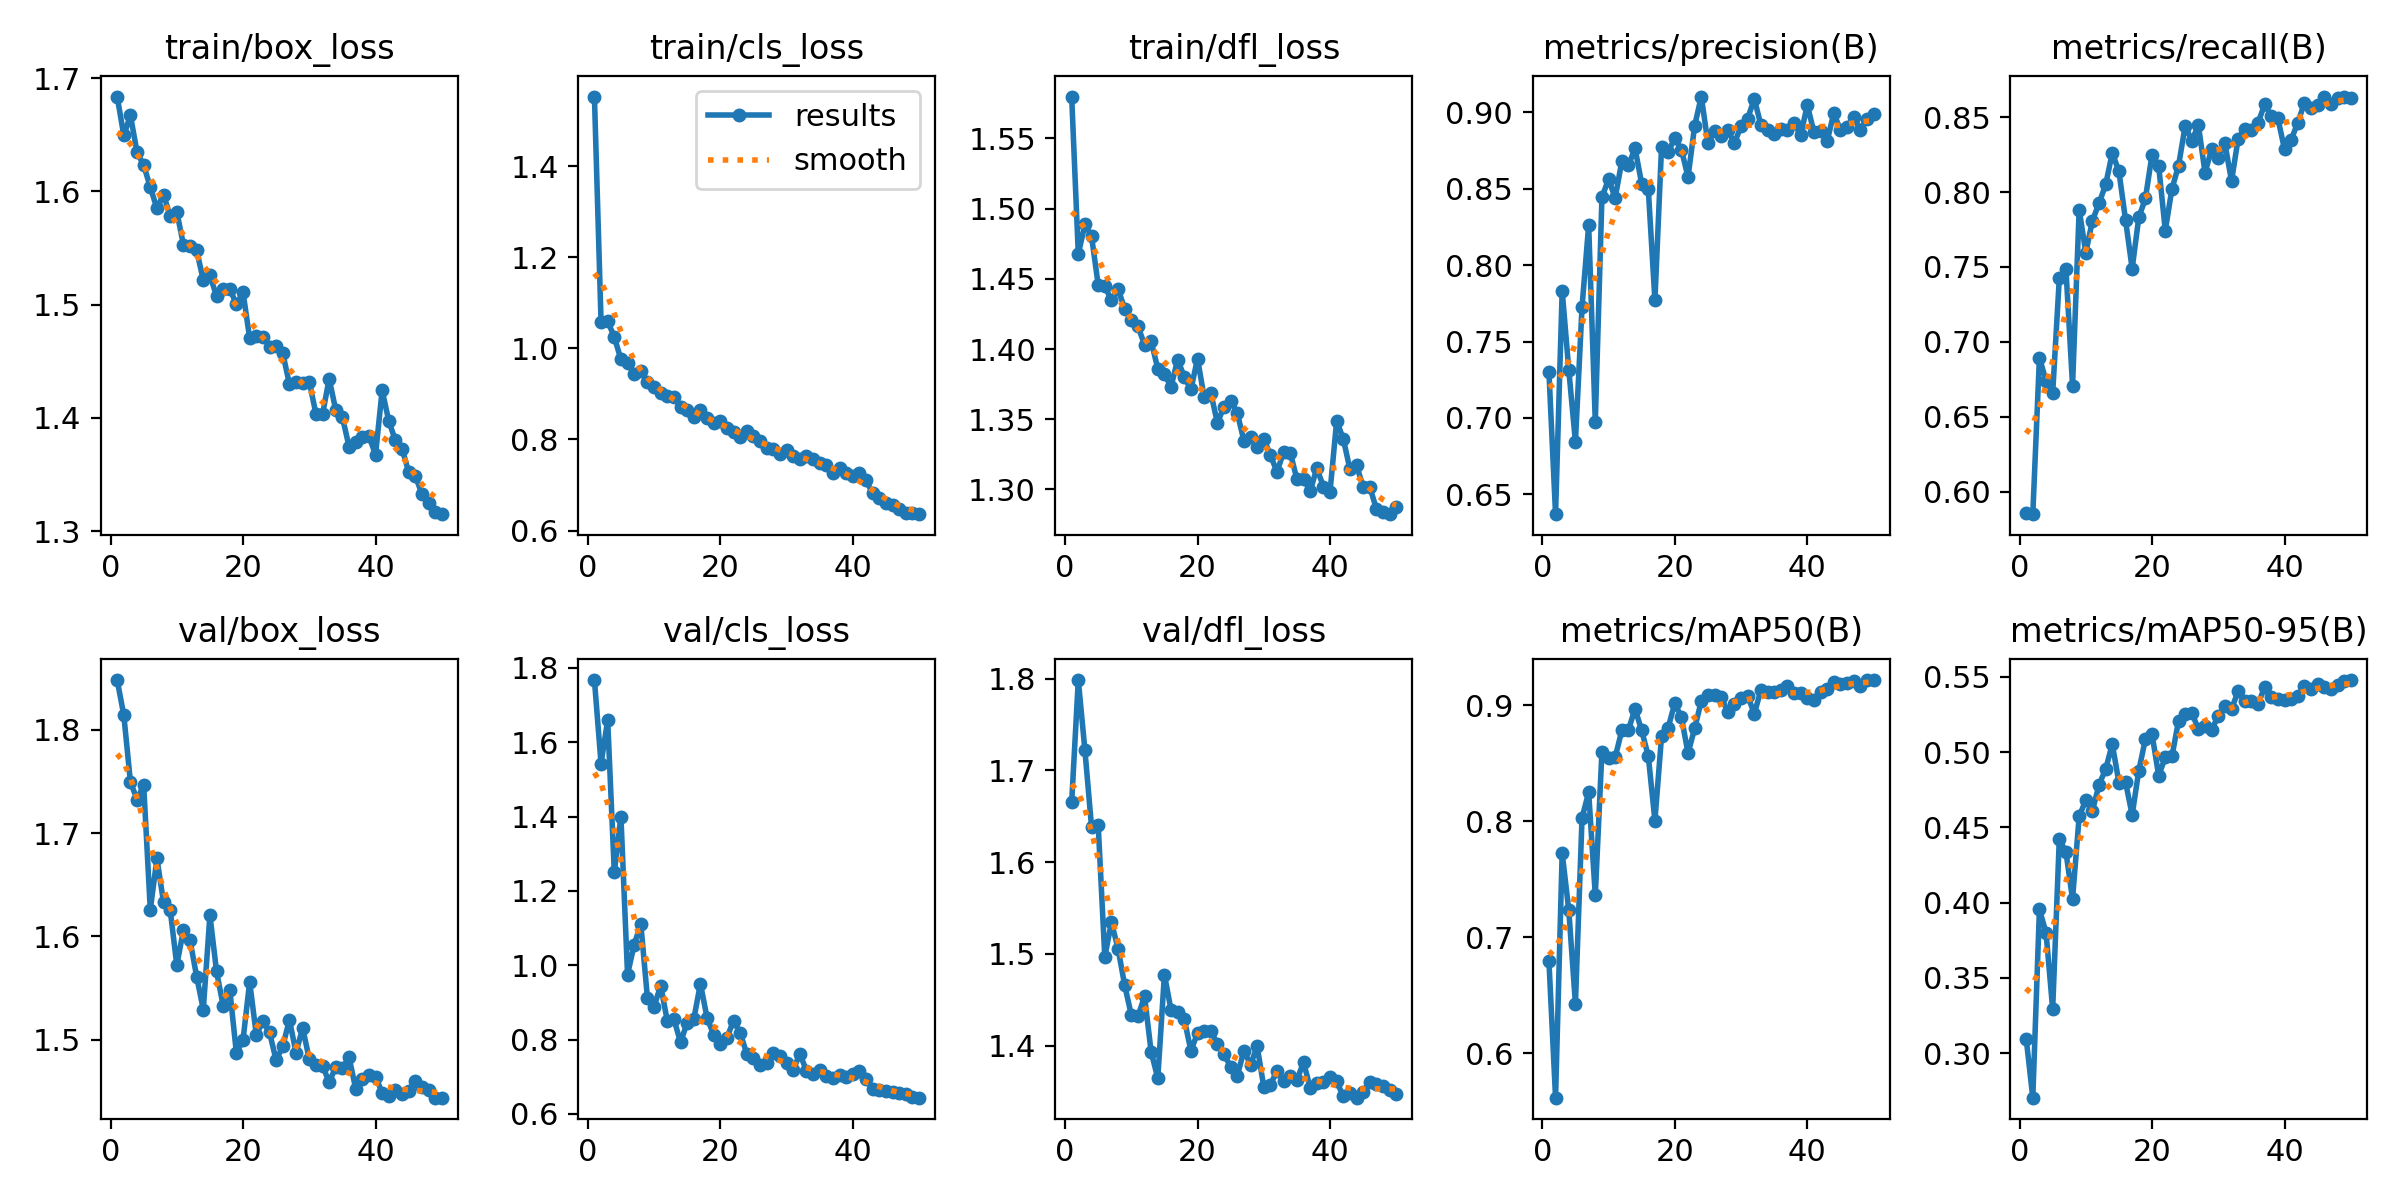

In [14]:
IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=800)

# precision recall curve

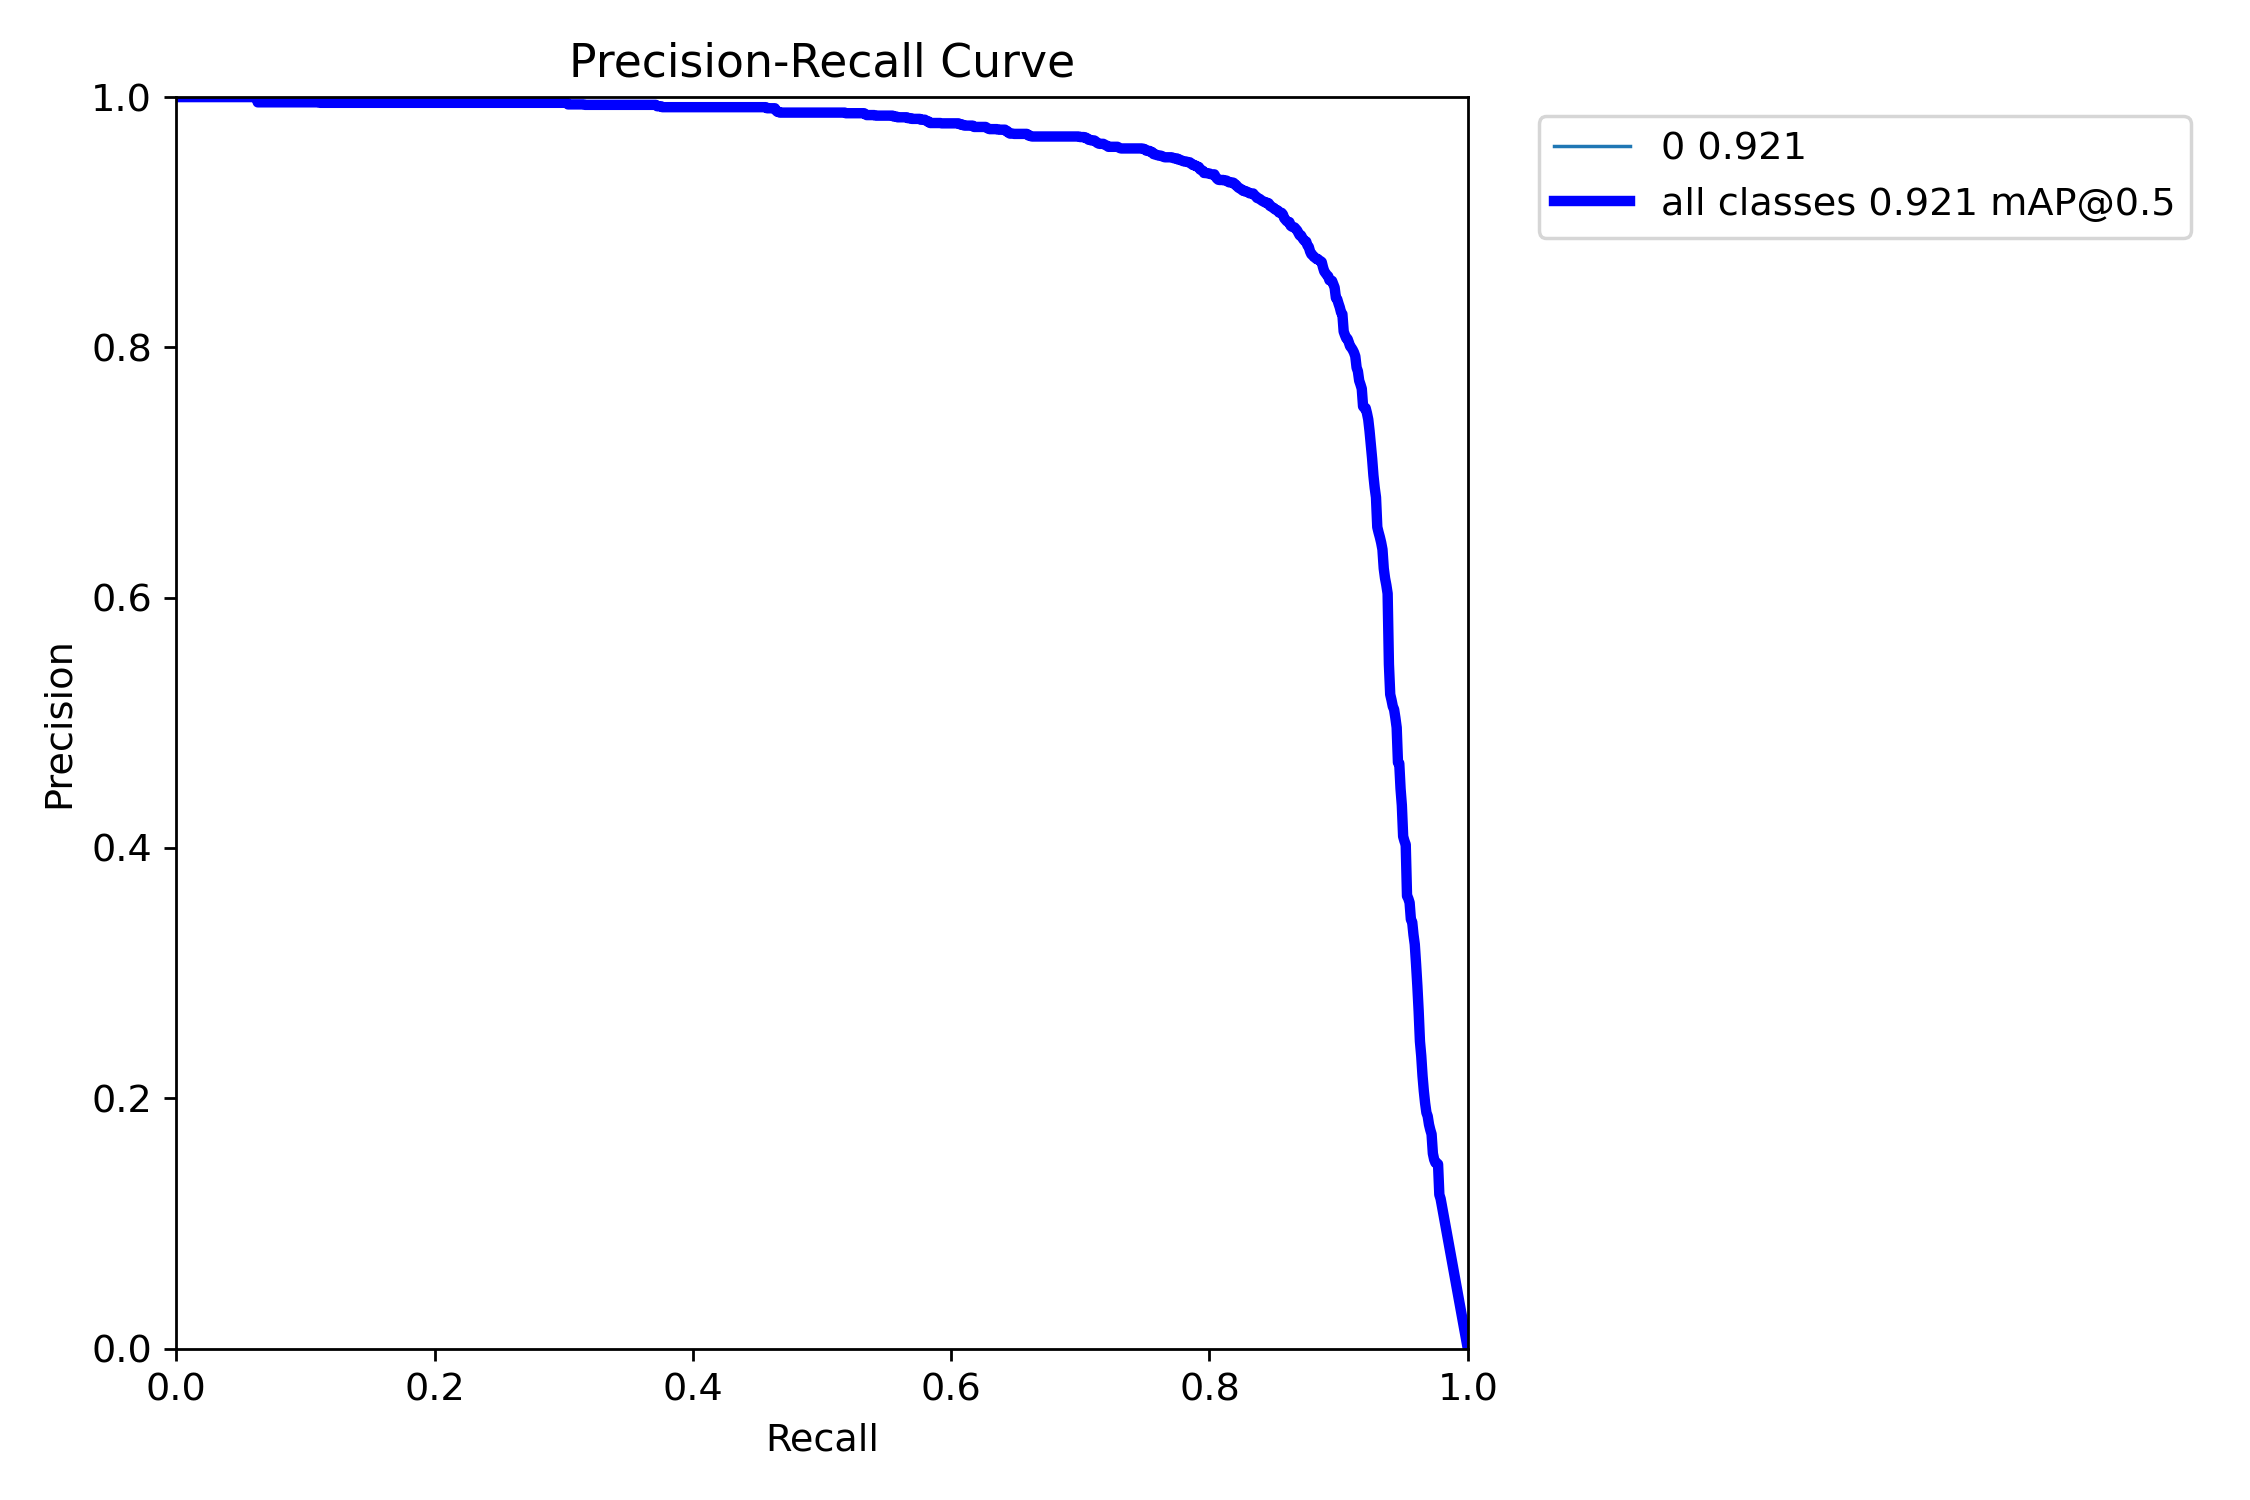

In [16]:
IPyImage(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=800)

In [21]:
import pandas as pd
df = pd.read_csv("runs/detect/train/results.csv")

In [24]:
df.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,596.698,1.34887,0.65626,1.30177,0.89040,0.86367,0.91982,0.54347,1.45994,0.65846,1.36029,0.000218,0.000218,0.000218
46,47,609.255,1.33305,0.64704,1.28623,0.89714,0.85842,0.92087,0.54173,1.45438,0.65575,1.35820,0.000178,0.000178,0.000178
47,48,621.741,1.32450,0.63758,1.28371,0.88862,0.86301,0.91658,0.54429,1.45139,0.65366,1.35600,0.000139,0.000139,0.000139
48,49,634.237,1.31700,0.63944,1.28240,0.89589,0.86305,0.92181,0.54757,1.44390,0.64648,1.35151,0.000099,0.000099,0.000099
49,50,646.840,1.31505,0.63606,1.28756,0.89908,0.86258,0.92194,0.54790,1.44402,0.64376,1.34755,0.000060,0.000060,0.000060


In [23]:
df.shape

(50, 15)

# preview of the trained result

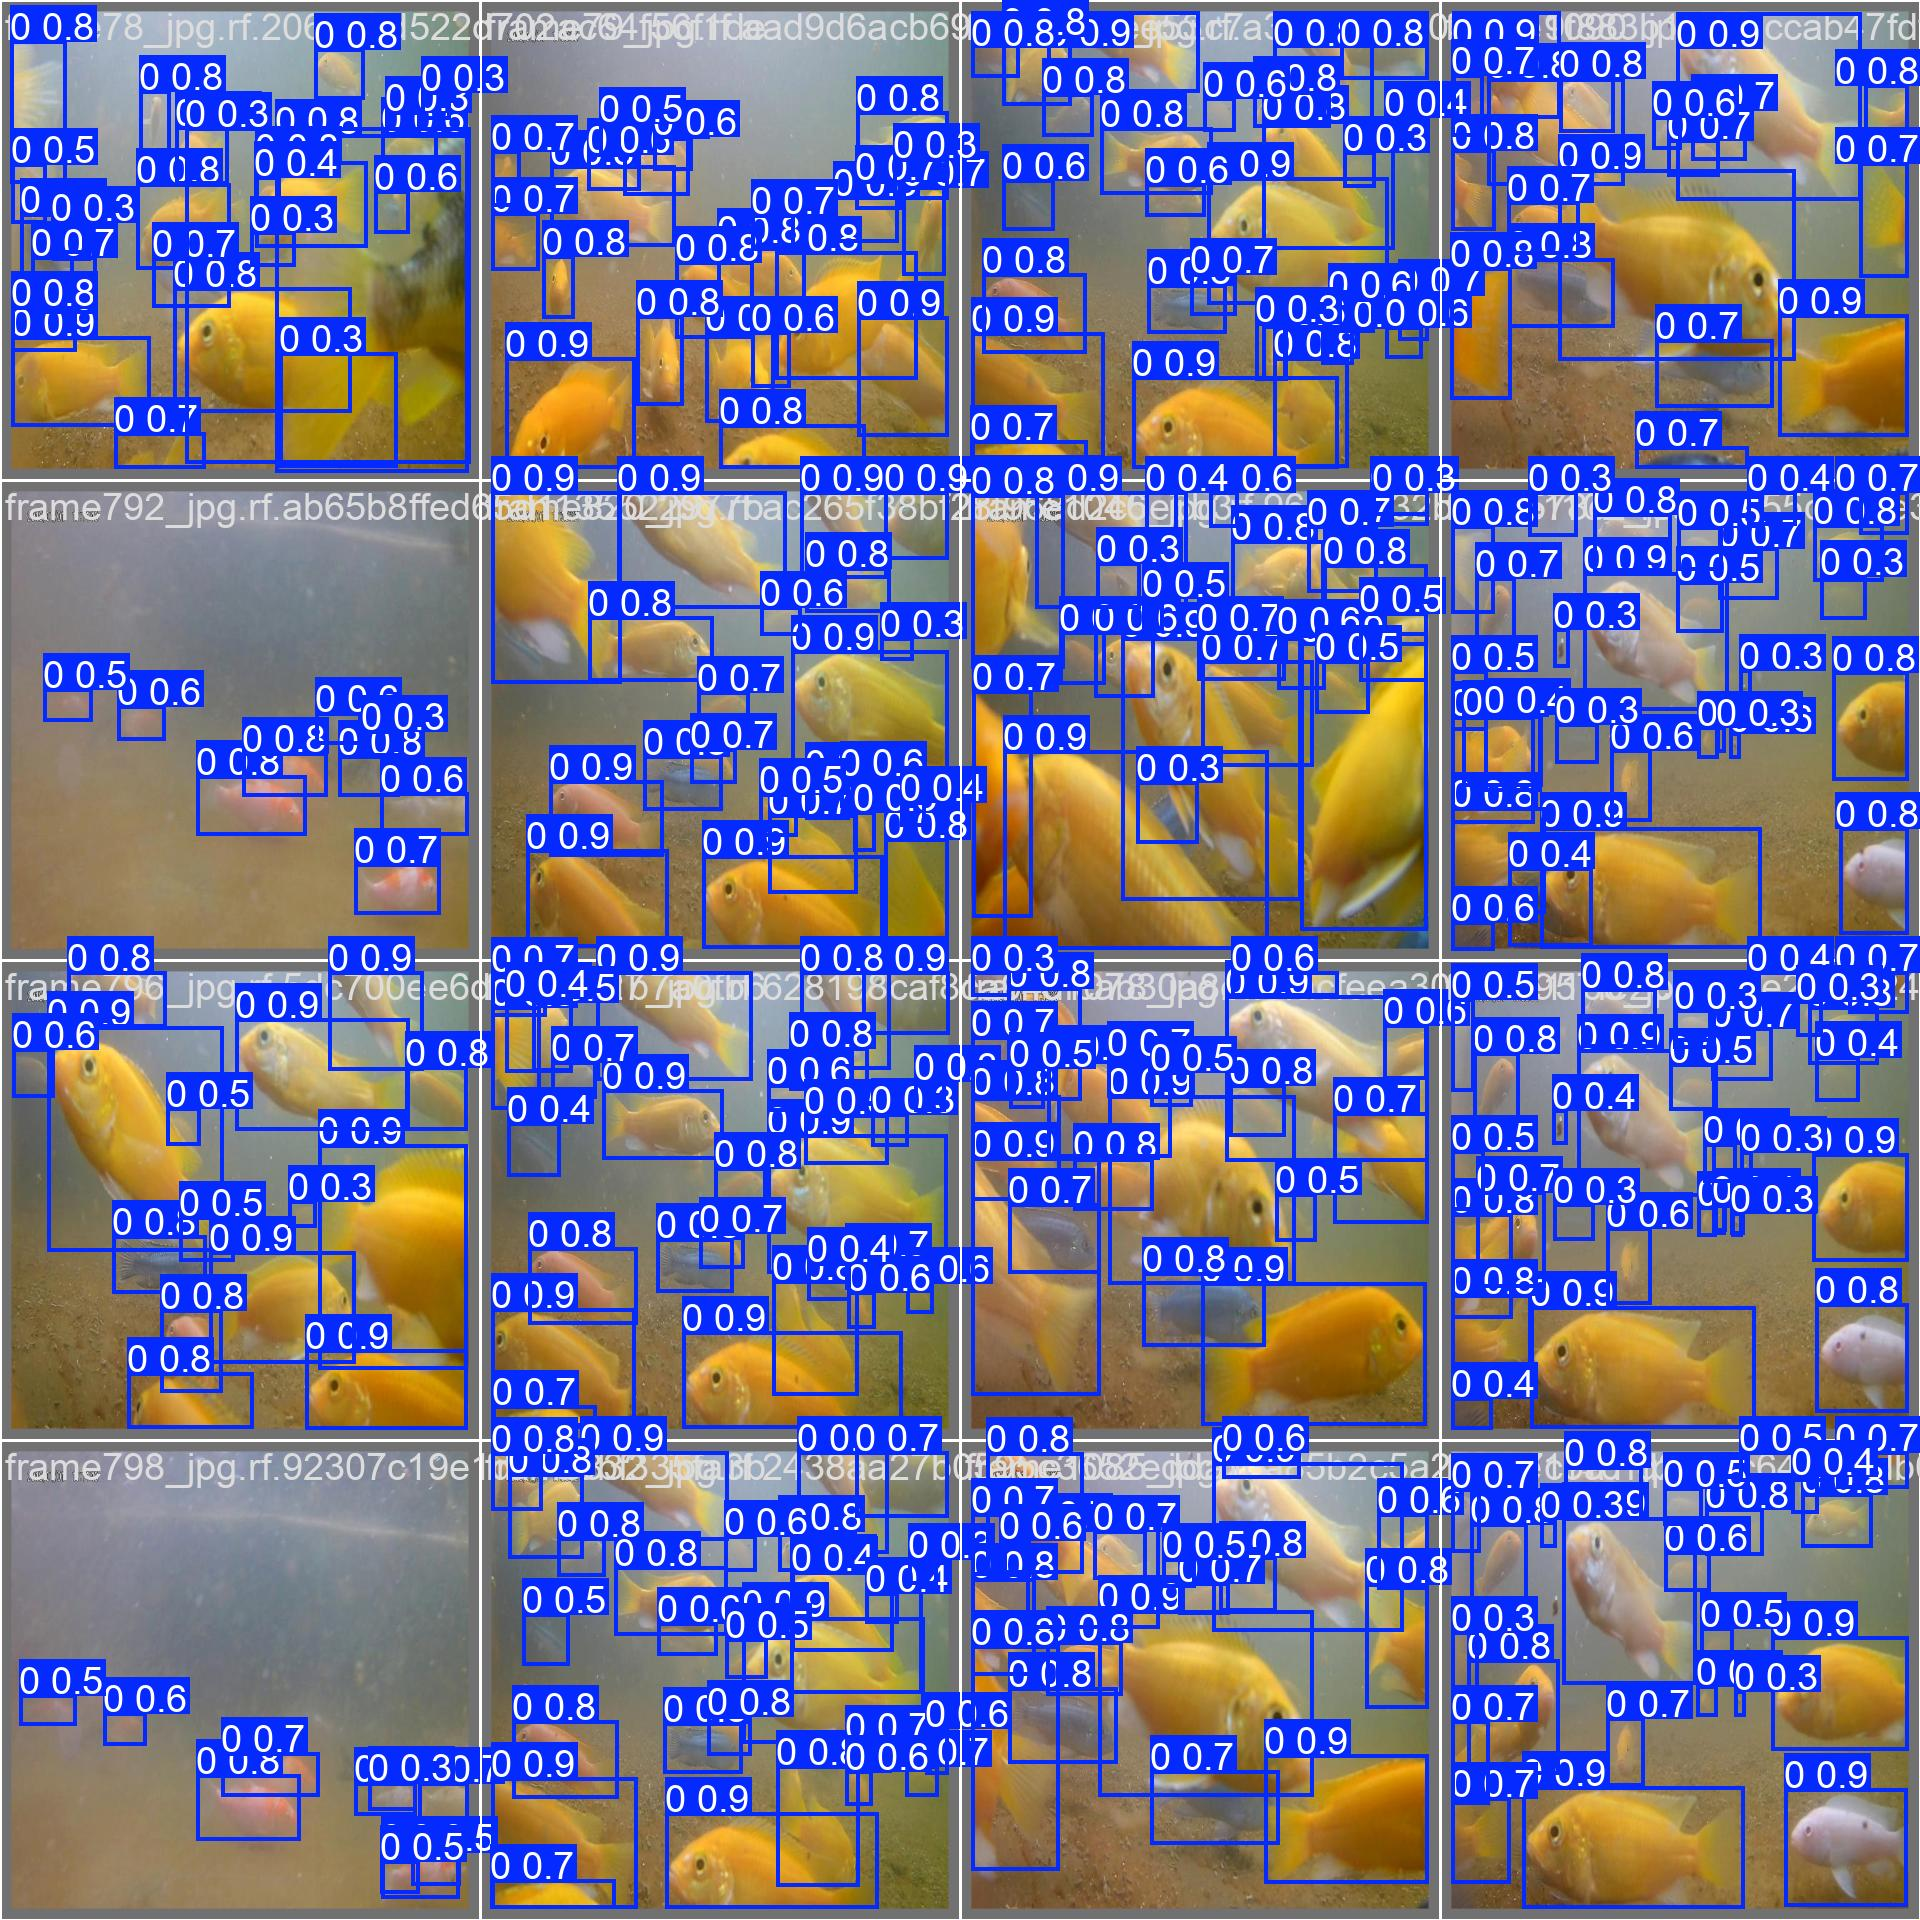

In [25]:
IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=800)

# validating custom model

## Precision: 0.897
## Recall: 0.863
## mAP50: 0.921

In [26]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /kaggle/working/fist-detection-1/valid/labels.cache... 118 images,
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        118       2154      0.897      0.863      0.921      0.548
Speed: 3.6ms preprocess, 18.2ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# inference result preview

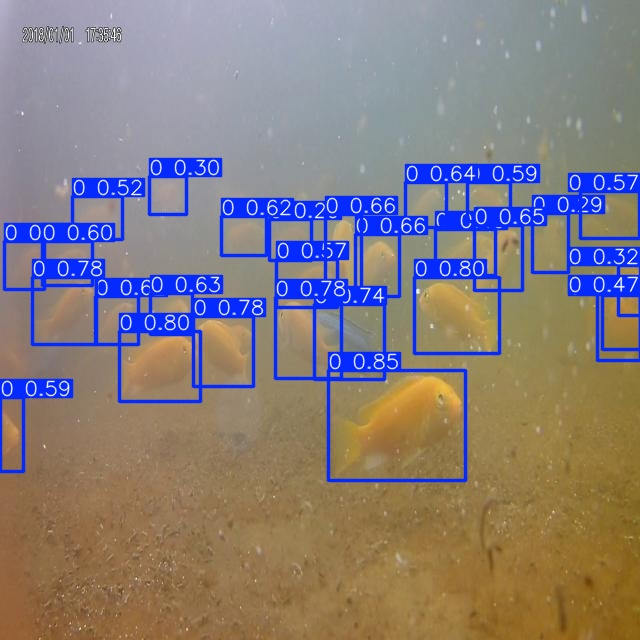

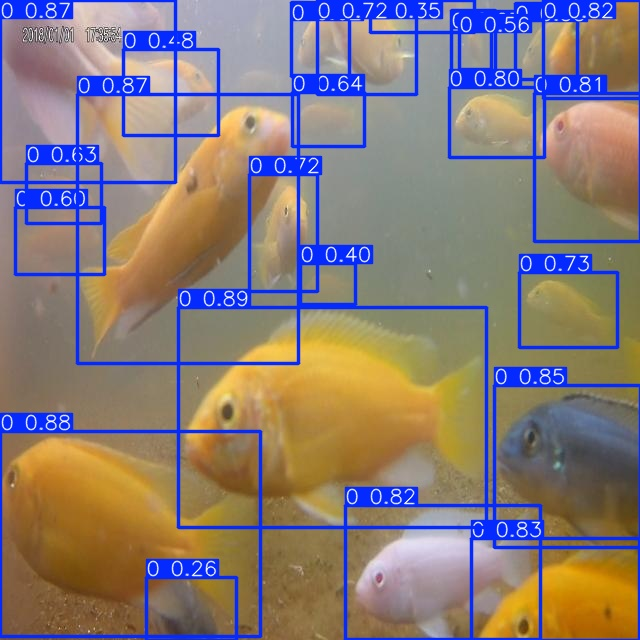

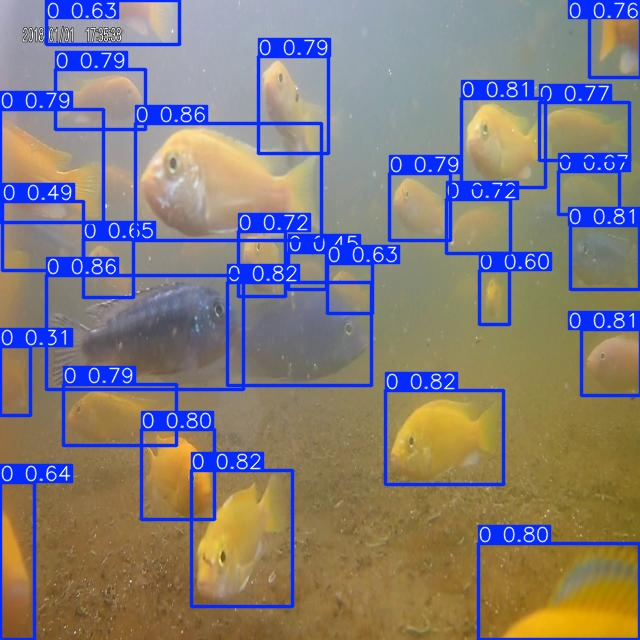

In [28]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# previewing particular image of the predicted image

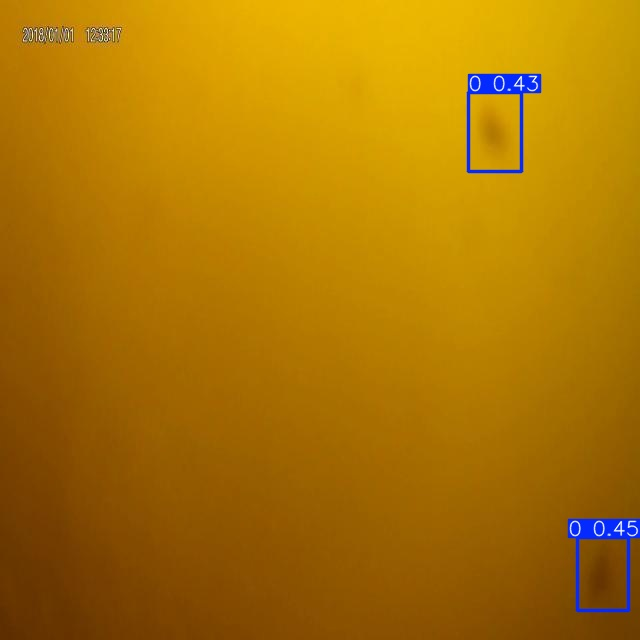

In [34]:
from IPython.display import Image

img_pred = glob.glob(f'{HOME}/runs/detect/predict/frame807_jpg.rf.58b9d15022f6bb77fe26b9a48bfcb874.jpg')

if img_pred:  # Check if the list is not empty
    display(Image(filename=img_pred[0], width=600))  # Use the first file
else:
    print("No image found at the specified path.")

# deploying model on roboflow

In [36]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/tomato-v0dw0/fist-detection-xw2vm/1
Share your model with the world at: https://universe.roboflow.com/tomato-v0dw0/fist-detection-xw2vm/model/1


# downloading YOLOv8 CAM

In [38]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git

fatal: destination path 'YOLO-V8-CAM' already exists and is not an empty directory.


In [39]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [40]:
!ls

fist-detection-1  runs	yolo11n.pt  yolo11s.pt	YOLO-V8-CAM


In [41]:
%cd /kaggle/working/YOLO-V8-CAM

/kaggle/working/YOLO-V8-CAM


In [42]:
!ls

 images        models	   yolo_cam
 LICENSE.txt   README.md  'YOLO v8n EigenCAM.ipynb'


In [43]:
!pip install ttach

In [45]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [46]:
img = cv2.imread('/kaggle/working/fist-detection-1/test/images/frame1008_jpg.rf.89584041e2d159612020a4759a75ba4f.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [47]:
import ultralytics
from ultralytics import YOLO
model = YOLO('/kaggle/working/yolo11n.pt') 
model.cpu()

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

# applying XAI

In [48]:
target_layers =[model.model.model[-2]]

In [51]:
cam = EigenCAM(model, target_layers,task='od')


0: 640x640 1 bird, 1 banana, 1 apple, 243.4ms
Speed: 6.4ms preprocess, 243.4ms inference, 23.9ms postprocess per image at shape (1, 3, 640, 640)


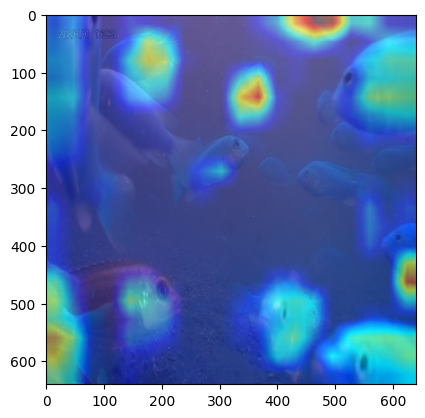

In [52]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 1 bird, 1 banana, 1 apple, 169.6ms
Speed: 4.0ms preprocess, 169.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


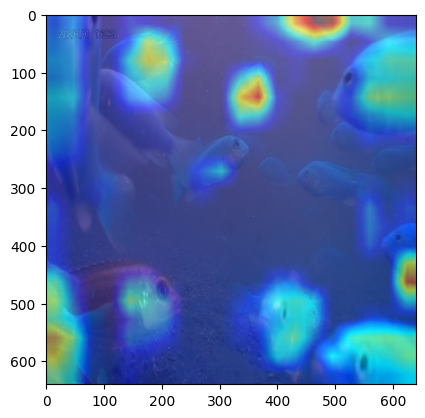

In [53]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

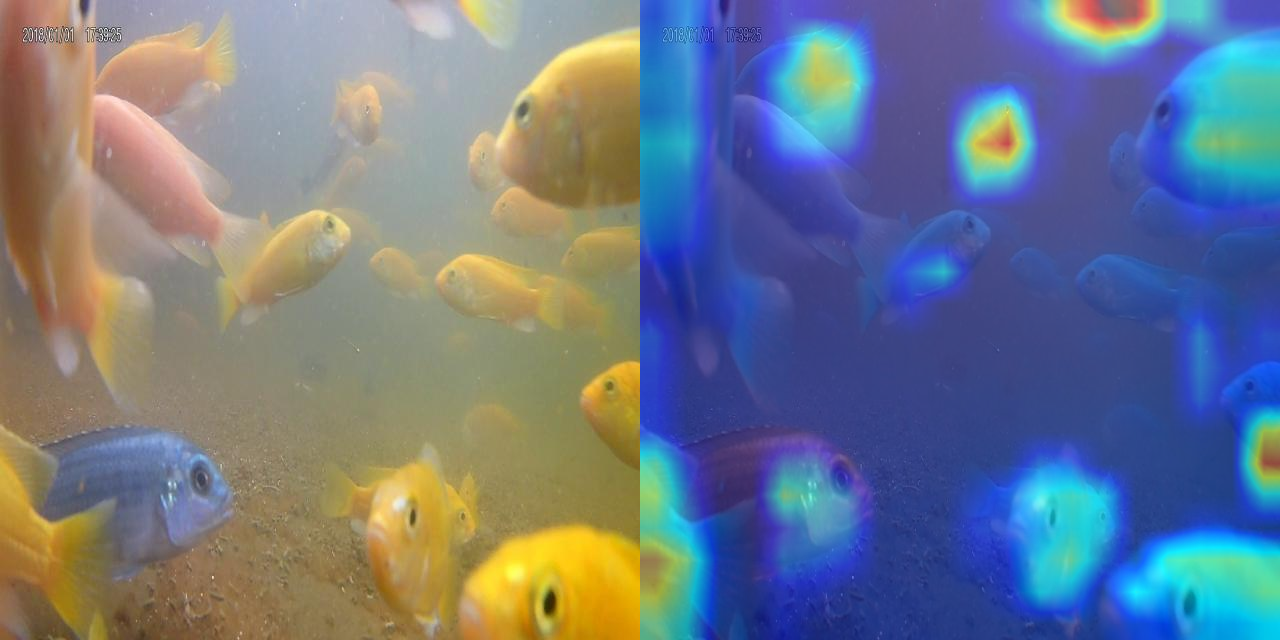

In [54]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))